In [98]:
from urllib.request import Request, urlopen
import re
from bs4 import BeautifulSoup
from csv import writer
from datetime import date

req = Request('https://www.idealista.pt/comprar-casas/lisboa/', headers={'User-Agent': 'Mozilla/5.0'})
#f = urlopen(req).read().decode("utf-8")
price=re.findall('Preço médio nesta zona \d*[.]\d* eur',f)
print(price)
price=re.findall('\d*[.]\d*',price[0])
today = date.today()
d1 = today.strftime("%d/%m/%Y")
price.append(d1)

def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)
        
append_list_as_row('lisbon_prices.csv',price)

['Preço médio nesta zona 5.158 eur']
['5.158']
04/09/2020
['5.158', '04/09/2020']


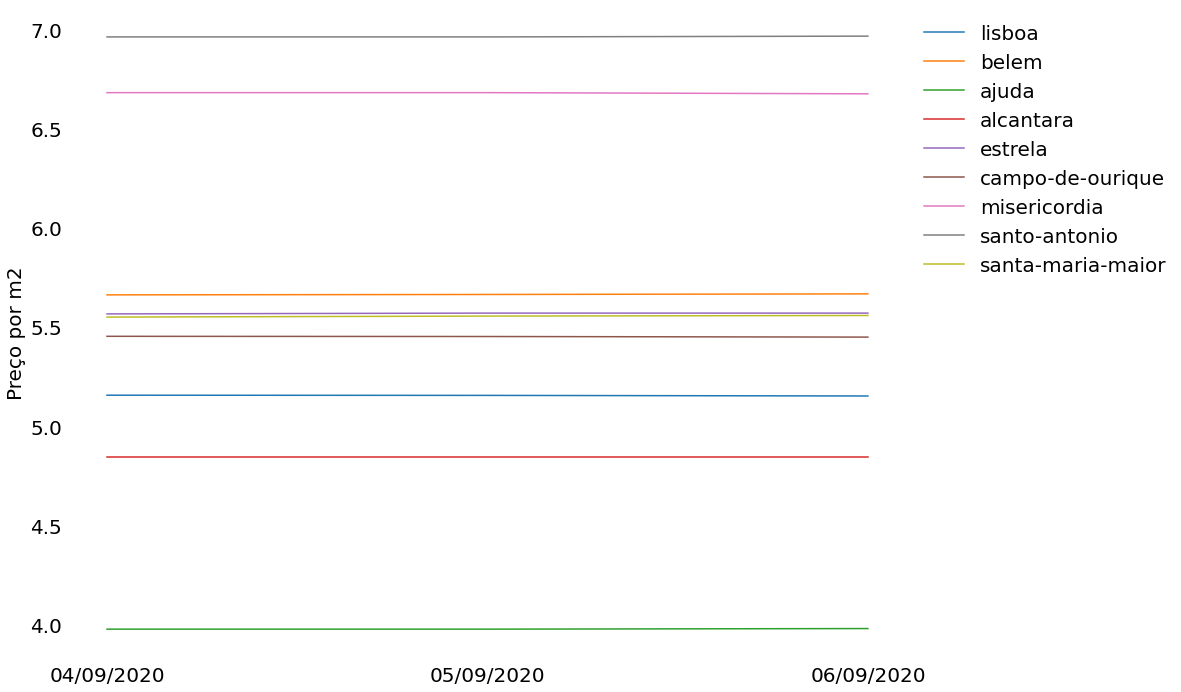

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

price_data = pd.read_csv('C:\\Users\\Francisco\\Dropbox\\Other\\lisbon_prices\\lisbon_prices.csv',names=['price','area','date'])
price_data.loc[price_data.area.isnull(),'area'] = 'lisboa'
price_data['area'] = price_data['area'].str.replace(r'/$', '')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plot_days = 1000
plticks = list(price_data.loc[price_data.area=='lisboa','date'].tail(plot_days))[0::max(1,int(len(list(price_data.loc[price_data.area=='lisboa','date'].tail(plot_days)))/20))]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.lineplot(x='date',y='price',hue='area',data=price_data,legend=None)
plt.xlabel('')
plt.ylabel('Preço por m2', fontsize=20)
lgd = ax.legend(price_data['area'], prop={'size': 20}, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.xticks(plticks)
ax.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False)
sns.despine(right=True, top=True, bottom=True, left=True)
#fig.autofmt_xdate()
fig.savefig('price_graph', bbox_extra_artists=(lgd,), bbox_inches='tight')


In [47]:
plticks

['04/09/2020', '05/09/2020', '06/09/2020']